# Įmonės finansinių rodiklių sąveikos su kitais rodikliais tyrimas (1 dalis)

## Duomenų paruošimas tyrimui

In [1]:
import pandas as pd
import numpy as np

In [2]:
#%run "P1 (duomenys).ipynb"

In [66]:
import pickle
#fnm = "/content/drive/MyDrive/Colab Notebooks/df3.pckl"
fnm = "df_2024_VLN.pckl"
with open(fnm, "rb") as f:
    df3 = pickle.load(f)

In [67]:
pavs = df3.columns
df3.sample(5)

,Revenue,Gross Profit,Operating Expenses,Sales per Employee,Operating Income (Loss),Cost of Goods & Services,Profit Margin
2021-03-31,6.9940,0.5580,1.0030,12762.7737,-0.3390,6.0810,-6.2911
2021-12-31,7.5910,0.4520,1.6130,14083.4879,-1.0300,6.7780,-14.8518
2015-03-31,8.4096,0.9677,1.3311,11318.4374,-0.3130,5.9902,-3.4489
2014-03-31,9.5295,1.3330,1.4728,12217.3075,-0.1045,5.9902,-1.5998
2016-03-31,7.0877,1.0585,1.2554,9617.0000,-0.1333,5.9902,-2.6298


In [68]:
from matplotlib import pyplot as plt
%matplotlib inline

## Atskirų finansinių straipsnių dinamika

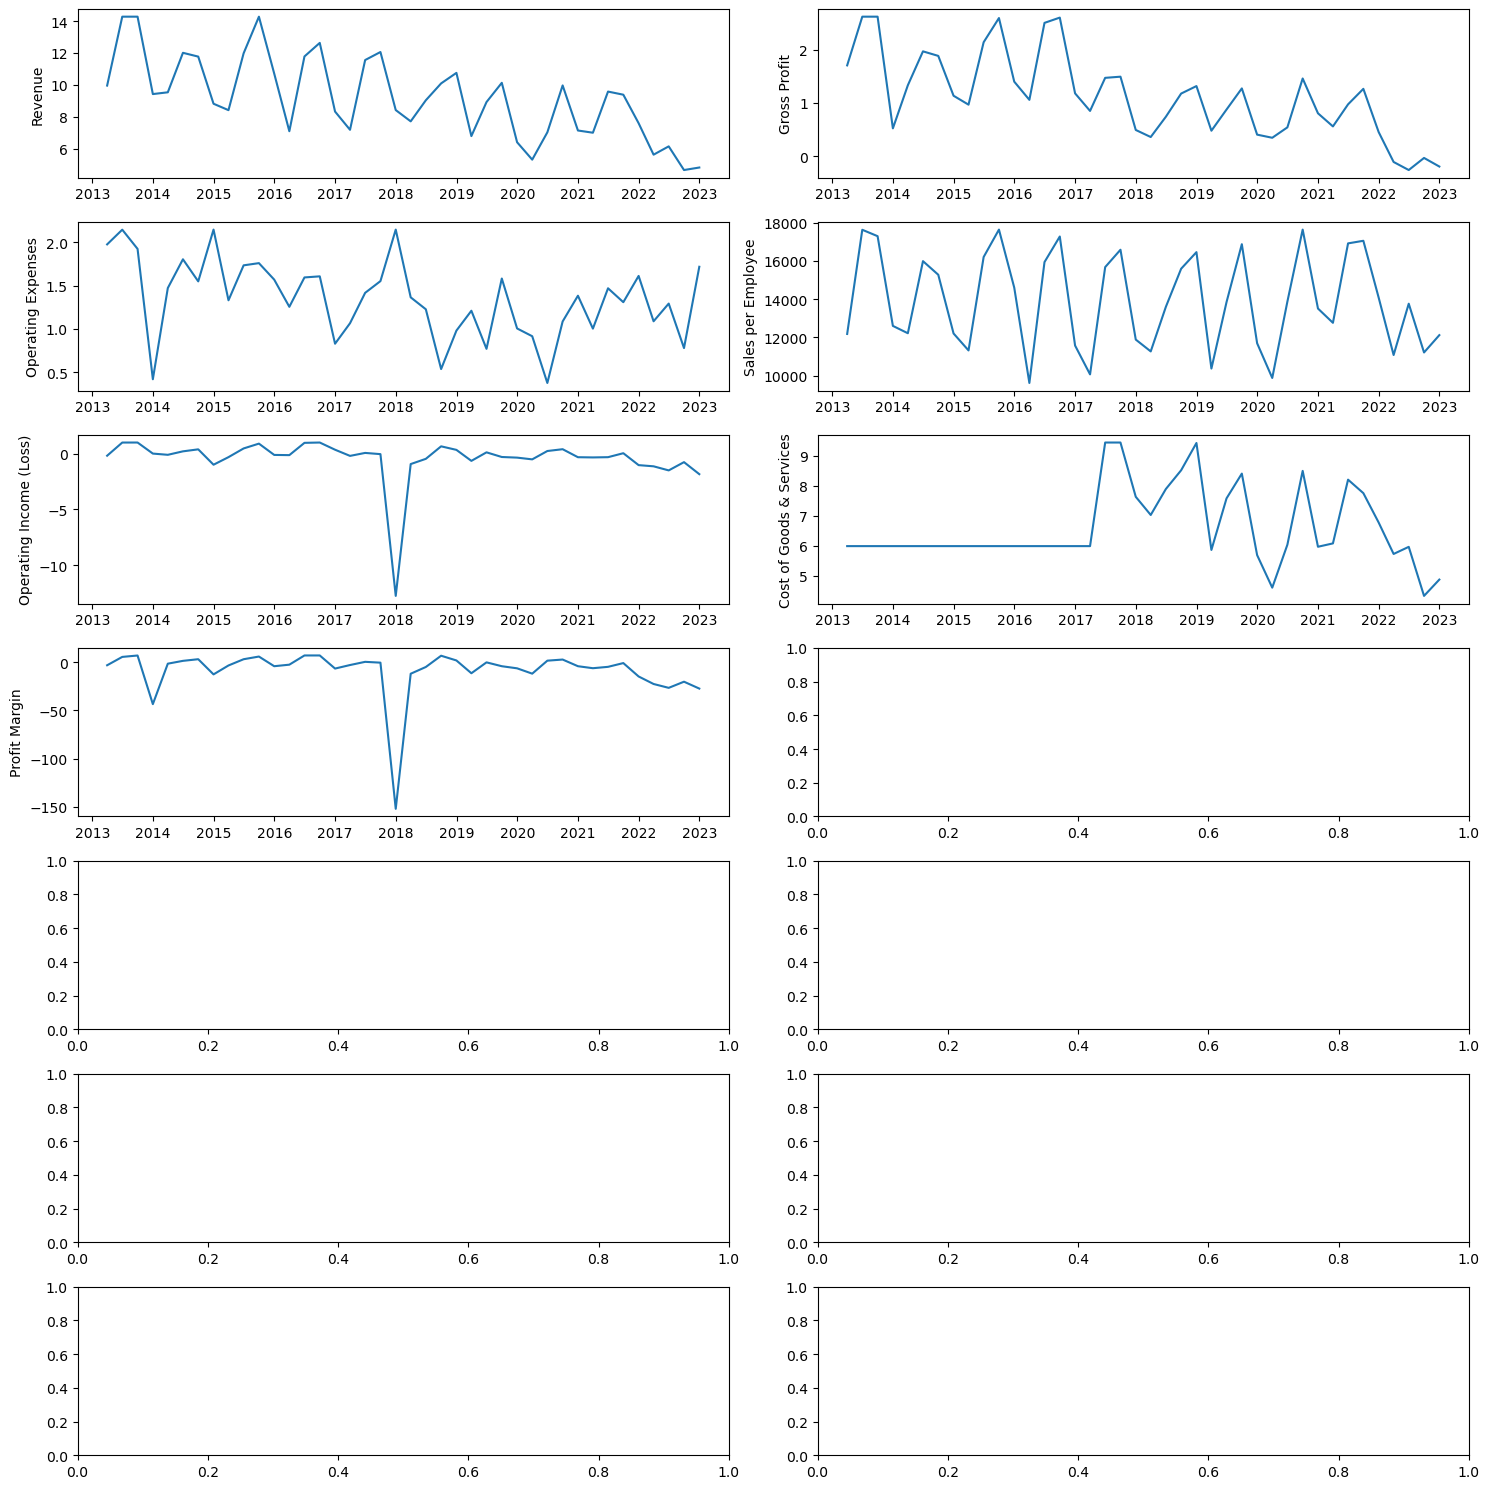

In [69]:
fig, ax = plt.subplots(7, 2, figsize=(15, 15))
i = -1
for c in df3.columns:
    i += 1
    ax.flatten()[i].plot(df3[c], label=c)
    #ax.flatten()[i].set_xlabel("Laikas")
    ax.flatten()[i].set_ylabel(c)
    #ax.flatten()[i].set_xticks(df3.index.values[range(0, 17, 7)])
    #ax.flatten()[i].set_yticks(df4[c].values[range(0, 40, 10)])
    #ax.flatten()[i].legend()
plt.gcf().tight_layout()
plt.show()

## Grafinis tarpusavio sąsajų vaizdavimas

### Dirbant su Numpy

In [ ]:
'''import pickle
fnm = "../data/X.pckl"
with open(fnm, "rb") as f:
    X = pickle.load(f)
np.shape(X)'''

In [ ]:
'''import os
fld = "/content/drive/MyDrive/Colab Notebooks/results/"
fld = "../results/"
try:
    os.mkdir(fld)
except:
    pass

pavs = df3.columns
n = len(X)
for i in range(n):
    for j in range(i+1, n):
        plt.plot(X[i], X[j], 'ro', markersize=8)
        plt.xlabel(pavs[i])
        plt.ylabel(pavs[j])
        plt.savefig(fld+pavs[i]+" vs "+pavs[j], dpi=600)
        plt.show()'''

### Dirbant su Pandas

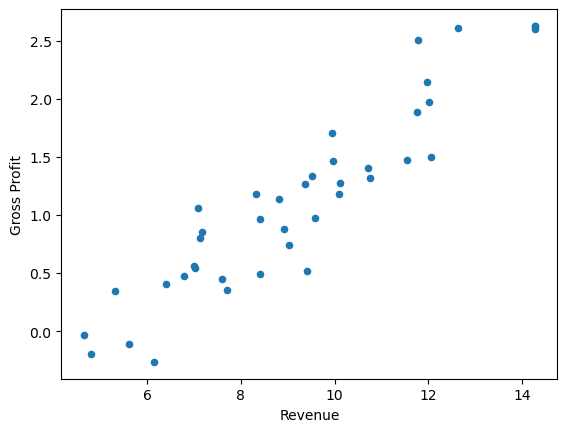

In [13]:
df3.plot(x=pavs[0], y=pavs[1], kind='scatter')
plt.show()

In [ ]:
"""n = len(df3.columns)
c = df3.columns
fig, ax = plt.subplots(n, n, figsize=(15,15))
for i in range(n):
    for j in range(n):
        if j >= i:
            ax[i,j].plot(df3.iloc[:,i], df3.iloc[:,j], 'r.')
            ax[i,j].set_xlabel(c[i])
            ax[i,j].set_ylabel(c[j])
plt.gcf().tight_layout()
plt.show()"""

## Koreliacinė analizė

                           Revenue  Gross Profit  Operating Expenses  \
                                                                       
Revenue                   1.000000      0.930817            0.473194   
Gross Profit              0.930817      1.000000            0.482653   
Operating Expenses        0.473194      0.482653            1.000000   
Sales per Employee        0.796521      0.691423            0.297015   
Operating Income (Loss)   0.301960      0.393944           -0.252286   
Cost of Goods & Services  0.351200      0.148249           -0.030412   
Profit Margin             0.317026      0.433618           -0.146486   

                          Sales per Employee  Operating Income (Loss)  \
                                                                        
Revenue                             0.796521                 0.301960   
Gross Profit                        0.691423                 0.393944   
Operating Expenses                  0.297015               

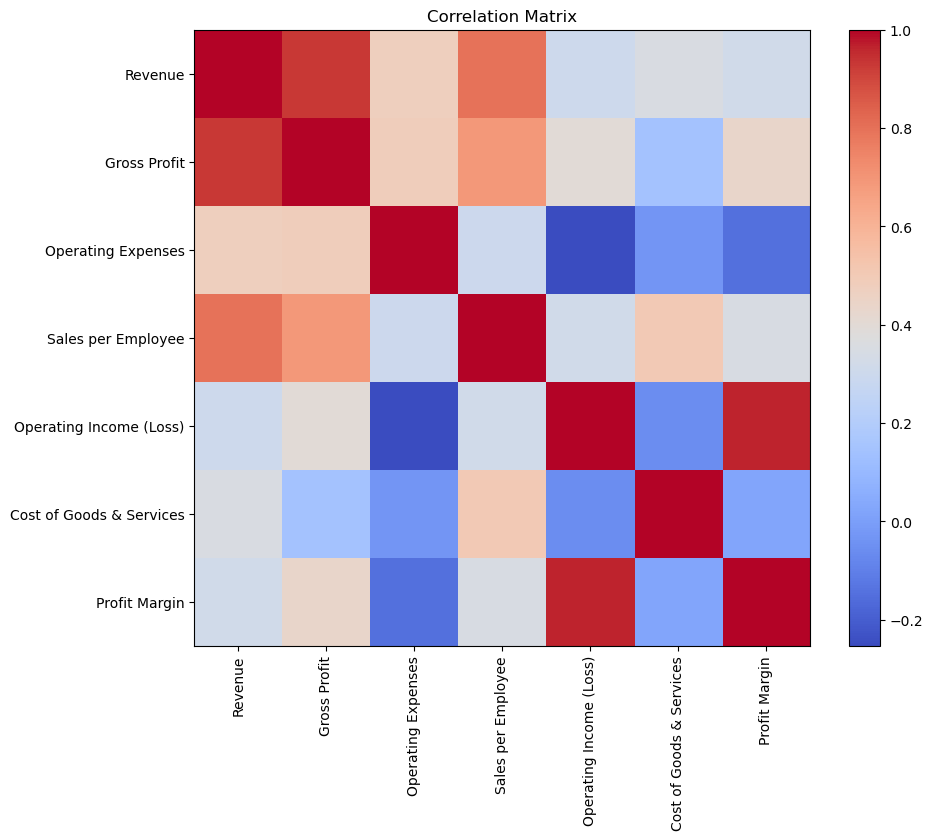

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your DataFrame
# Calculate the correlation matrix
correlation_matrix = df3.corr()

# Print the correlation matrix
print(correlation_matrix)

# If you want to visualize the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

In [71]:
pavs

Index(['Revenue', 'Gross Profit', 'Operating Expenses', 'Sales per Employee',
       'Operating Income (Loss)', 'Cost of Goods & Services', 'Profit Margin'],
      dtype='object', name='')

In [72]:
X = df3.loc[:,:].transpose().to_numpy()
np.shape(X)

(7, 40)

In [73]:
import scipy.stats as stats
x = X[0]
y = X[3]
rp = stats.pearsonr(x, y)
rs = stats.spearmanr(x, y)
rk = stats.kendalltau(x, y)
print("Pirsono koreliacijos koeficientas:", rp)
print("Spirmeno koreliacijos koeficientas:", rs)
print("Kendalo tau koreliacijos koeficientas:", rk)

Pirsono koreliacijos koeficientas: PearsonRResult(statistic=0.7965209844438725, pvalue=7.907238182419522e-10)
Spirmeno koreliacijos koeficientas: SignificanceResult(statistic=0.8041092034900085, pvalue=4.1246081524570087e-10)
Kendalo tau koreliacijos koeficientas: SignificanceResult(statistic=0.6059050064184852, pvalue=3.797169543000164e-08)


In [74]:
# Jei reikėtų nevertinti trūkstamų reikšmių
import scipy.stats as stats
import numpy as np
X = np.array(X)
kint1 = 0
kint2 = 3
id1 = ~np.isnan(X[kint1])
id2 = ~np.isnan(X[kint2])
rp = stats.pearsonr(X[kint1][id1*id2],\
                    X[kint2][id1*id2])
rs = stats.spearmanr(X[kint1][id1*id2],\
                    X[kint2][id1*id2])
rk = stats.kendalltau(X[kint1][id1*id2],\
                    X[kint2][id1*id2])
rp, rs, rk

(PearsonRResult(statistic=0.7965209844438725, pvalue=7.907238182419522e-10),
 SignificanceResult(statistic=0.8041092034900085, pvalue=4.1246081524570087e-10),
 SignificanceResult(statistic=0.6059050064184852, pvalue=3.797169543000164e-08))

In [75]:
# Bendra koreliacinė matrica naudojant pandas
df3.corr(method="pearson")

,Revenue,Gross Profit,Operating Expenses,Sales per Employee,Operating Income (Loss),Cost of Goods & Services,Profit Margin
,,,,,,,
Revenue,1.000000,0.930817,0.473194,0.796521,0.301960,0.351200,0.317026
Gross Profit,0.930817,1.000000,0.482653,0.691423,0.393944,0.148249,0.433618
Operating Expenses,0.473194,0.482653,1.000000,0.297015,-0.252286,-0.030412,-0.146486
Sales per Employee,0.796521,0.691423,0.297015,1.000000,0.318114,0.503064,0.346860
Operating Income (Loss),0.301960,0.393944,-0.252286,0.318114,1.000000,-0.057429,0.960901
Cost of Goods & Services,0.351200,0.148249,-0.030412,0.503064,-0.057429,1.000000,0.022393
Profit Margin,0.317026,0.433618,-0.146486,0.346860,0.960901,0.022393,1.000000


In [76]:
df3.index

DatetimeIndex(['2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31'],
              dtype='datetime64[ns]', freq=None)

In [77]:
# Vėlintos tarpusavio koreliacijos (kiekvienas su kiekvienu)
n = len(X)
for i in range(1, n):
    taumax = 4
    cors = []
    nn = len(X[i])
    for tau in range(0, taumax+1):
        x1 = X[0][tau:]
        x2 = X[i][0:(nn-tau)]
        #id1 = ~np.isnan(x1)
        #id2 = ~np.isnan(x2)
        #rp = stats.pearsonr(x1[id1*id2], x2[id1*id2])
        rp = stats.pearsonr(x1, x2)
        cors.append(rp[0])
    print("Koreliacija tarp", pavs[0],\
         "ir", pavs[i], ",", cors)

Koreliacija tarp Revenue ir Gross Profit , [0.9308165180855662, 0.564680780047962, 0.10383562594175631, 0.3539443635961335, 0.7323319319636354]
Koreliacija tarp Revenue ir Operating Expenses , [0.47319395970340666, 0.27706148772570227, 0.1388102004555545, 0.24580130867992614, 0.4415789330833186]
Koreliacija tarp Revenue ir Sales per Employee , [0.7965209844438725, 0.12069105682211484, -0.4826275886497008, 0.0381714163699842, 0.4533033770559724]
Koreliacija tarp Revenue ir Operating Income (Loss) , [0.30196004008878147, 0.23280275777894857, 0.006563482142514954, -0.003074293872939355, 0.035888441509937793]
Koreliacija tarp Revenue ir Cost of Goods & Services , [0.35119968709789867, -0.009298576294668265, -0.3376671695327509, -0.19492159859169148, -0.12141421348730146]
Koreliacija tarp Revenue ir Profit Margin , [0.3170259528841746, 0.2653355922560737, -0.01813598231352096, -0.061390539269729594, 0.023953680034234932]


<p>Pastebėtos išvados:</p>
<ul>
    <li>Didžiausias tiesinis ryšys tarp pajamų ir grynojo pelno yra tame pačiame ketvirtyje (r=0,65).</li>
    <li>Didžiausias tiesinis ryšys tarp pajamų ir veiklos išlaidų yra tame pačiame ketvirtyje (r=0,35).</li>
    <li>Didžiausias tiesinis ryšys tarp pajamų ir pardavimų vienam darbuotojui yra per metų skirtumą (r=0,62). Tai sufleruoja ir priežastingumo ryšį.</li>
    <li>...</li>
</ul>

In [78]:
# Automatizavimas įvairiems vėlinimams

In [79]:
def velintaKoreliacija(df, tau, mincorr):
    """df - duomenys
tau - vėlinimas
mincorr - min slenkstis cor rodymui"""
    Cs = []
    n = len(df.columns)
    c = df.columns
    for i in range(n):
        for j in range(n):
            if j != i:
                x1 = df.iloc[:,i]
                x2 = df.iloc[:,j]
                # Duomenu velinimas
                #tau = 5
                if tau == 0:
                    x12 = x1.copy()
                else:
                    x12 = x1[:(-tau)]
                x22 = x2[tau:]
                # Koreliacijos skaiciavimas
                #C = np.corrcoef(x12, x22)[0,1]
                C, Cp = stats.pearsonr(x12, x22)
                if abs(C) >= mincorr:
                    Cs.append([c[i], c[j], C, Cp, tau])
    # per tau anksčiau imamas x1 turi tiesinę sąsają su x2.
    return(Cs)

In [80]:
for k in range(0, 9):
    Cs = velintaKoreliacija(df3, k, 0.5)
    Cs2 = pd.DataFrame(data=Cs, columns=["x1", "x2", "r", "p", "tau"])
    Cs2.sort_values(by="r", inplace=True, ascending=False)
    print("Velinimas:", k)
    print(Cs2)
    print("\n")

Velinimas: 0
                         x1                        x2         r             p  \
7   Operating Income (Loss)             Profit Margin  0.960901  8.579329e-23   
9             Profit Margin   Operating Income (Loss)  0.960901  8.579329e-23   
0                   Revenue              Gross Profit  0.930817  3.371268e-18   
2              Gross Profit                   Revenue  0.930817  3.371268e-18   
1                   Revenue        Sales per Employee  0.796521  7.907238e-10   
4        Sales per Employee                   Revenue  0.796521  7.907238e-10   
3              Gross Profit        Sales per Employee  0.691423  7.815956e-07   
5        Sales per Employee              Gross Profit  0.691423  7.815956e-07   
6        Sales per Employee  Cost of Goods & Services  0.503064  9.377706e-04   
8  Cost of Goods & Services        Sales per Employee  0.503064  9.377706e-04   

   tau  
7    0  
9    0  
0    0  
2    0  
1    0  
4    0  
3    0  
5    0  
6    0  
8    

## Pilkasis sutapimo koeficientas

In [81]:
'''import pickle
with open("df4.pckl", "rb") as f:
    df = pickle.load(f)
df.head()'''

'import pickle\nwith open("df4.pckl", "rb") as f:\n    df = pickle.load(f)\ndf.head()'

In [82]:
x1 = df3["Revenue"].to_numpy()
x2 = df3["Operating Expenses"].to_numpy()
label1 = "Pajamos"
label2 = "Veikos išlaidos"
print(label1, x1, "\n", label2, x2)

Pajamos [ 9.9512  14.27412 14.27412  9.4186   9.5295  12.007   11.7686   8.8122
  8.4096  11.9757  14.2732  10.7045   7.0877  11.779   12.6288   8.3214
  7.1771  11.5532  12.057    8.415    7.707    9.029   10.088   10.748
  6.782    8.917   10.125    6.397    5.305    7.019    9.961    7.133
  6.994    9.575    9.379    7.591    5.617    6.138    4.653    4.811  ] 
 Veikos išlaidos [1.9782   2.1483   1.926    0.417    1.4728   1.8056   1.55     2.149315
 1.3311   1.7356   1.7611   1.5702   1.2554   1.5955   1.6082   0.8283
 1.0654   1.4172   1.553    2.149315 1.365    1.227    0.535    0.98
 1.21     0.769    1.583    1.005    0.915    0.374    1.086    1.384
 1.003    1.47     1.309    1.613    1.088    1.293    0.778    1.719   ]


## Sąsaja tarp 2 finansinių straipsnių

In [83]:
def gray(x, y, rho):
    """x, y - numpy tipo masyvai.
    Grąžinamas pilkojo sutapimo lygis (vidutinis koeficientas)."""
    
    '''id1 = ~np.isnan(x)
    id2 = ~np.isnan(y)
    x = x[id1 * id2]
    y = y[id1 * id2]'''
    
    # normavimas
    #import pdb; pdb.set_trace()
    xn = x / x[0]
    yn = y / y[0]
    deltai = np.abs(yn - xn)
    deltam = min(deltai)
    deltaM = max(deltai)
    #gama_12 = [deltam + rho*deltaM / (d + rho*deltaM) for d in delta]
    gammak = (deltam + rho*deltaM)/(deltai + rho*deltaM)
    gamma = np.nanmean(gammak)
    return([gamma, gammak])

In [84]:
#n = len(x1)
rho = 1/2
gama, gama_12 = gray(x1, x2, rho)
print(gama)
print(gama_12)

0.6144658012246714
[1.         0.51612676 0.44645321 0.33562656 0.63556183 0.5584611
 0.48219825 0.64904659 0.68336888 0.53265598 0.40585714 0.56862185
 0.82721517 0.49633711 0.44898156 0.47094545 0.67047395 0.45532664
 0.46560662 0.60675178 0.81482837 0.56420265 0.33333333 0.38862453
 0.84177267 0.42281668 0.63109933 0.73383416 0.84043798 0.41855689
 0.45122247 0.95583566 0.65494361 0.62911983 0.56963352 0.87608835
 0.96255051 0.90987096 0.83339864 0.49084548]


In [85]:
# Anomalijų aptarimas
gamma_max = max(gama_12[1:])
ID = gamma_max == gama_12
t = df3.index.values
tmin = t[ID][0]
#print(np.datetime_as_string(tmin, unit='D'))
print(t[ID], gama_12[ID])

'''ID = max(gama_12) == gama_12 # np.argmax()
t = df3.index.values
tmin = t[ID][0]
#print(np.datetime_as_string(tmin, unit='D'))
print(t[ID], gama_12[ID])'''

#from datetime import datetime
#date_time = datetime(tmin).strftime("%Y/%m/%d, %H:%M:%S")
#date_time

['2022-03-31T00:00:00.000000000'] [0.96255051]


"ID = max(gama_12) == gama_12 # np.argmax()\nt = df3.index.values\ntmin = t[ID][0]\n#print(np.datetime_as_string(tmin, unit='D'))\nprint(t[ID], gama_12[ID])"

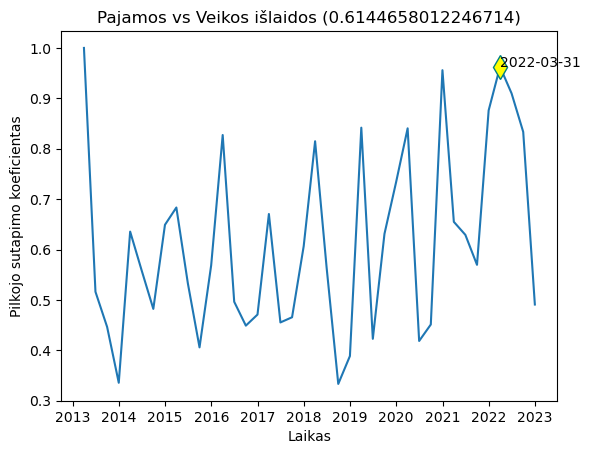

In [86]:
# Pilkojo sutapimo koeficiento dinamika
coefs = np.array(gama_12)
#plt.clf()
plt.plot(t, coefs)
plt.plot(tmin, gamma_max, "d", markersize=12,
         markerfacecolor="yellow", markeredgecolor="teal")
plt.text(tmin, gamma_max, np.datetime_as_string(t[ID][0], unit='D'))
plt.xlabel("Laikas")
plt.ylabel("Pilkojo sutapimo koeficientas")
plt.title(label1 + " vs " + label2 +" ("+ str(gama) + ")")
plt.show()

In [87]:
# Vėlinti tarpusavio pilkojo sutapimo lygiai (kiekvienas su kiekvienu)
n = len(X)
for i in range(1, n):
    taumax = 2
    cors = []
    nn = len(X[i])
    for tau in range(0, taumax+1):
        x1 = X[0][tau:]
        x2 = X[i][0:(nn-tau)]
        #id1 = ~np.isnan(x1)
        #id2 = ~np.isnan(x2)
        #rp = gray(x1[id1*id2], x2[id1*id2])
        rp = gray(np.array(x1), np.array(x2), rho)
        cors.append(rp[0])
    print("Pilkojo sut. lygis tarp", pavs[0],\
         "ir", pavs[i], ",", cors)

Pilkojo sut. lygis tarp Revenue ir Gross Profit , [0.5936426942977631, 0.6406560891972825, 0.6230855493096132]
Pilkojo sut. lygis tarp Revenue ir Operating Expenses , [0.6144658012246714, 0.6357983817489139, 0.6245657171678269]
Pilkojo sut. lygis tarp Revenue ir Sales per Employee , [0.5977825064863673, 0.5248252467028859, 0.5449242476273198]
Pilkojo sut. lygis tarp Revenue ir Operating Income (Loss) , [0.9080083009380241, 0.9145140729986599, 0.9165601491314974]
Pilkojo sut. lygis tarp Revenue ir Cost of Goods & Services , [0.4879010606852504, 0.587598036862056, 0.5709161689375566]
Pilkojo sut. lygis tarp Revenue ir Profit Margin , [0.8958189406259139, 0.9031718425112689, 0.909855816702629]


## Sąsaja tarp 1 ir kitų 2 finansinių straipsnių

In [88]:
import numpy as np

In [89]:
x2 = df3["Revenue"].to_numpy()
x1 = df3["Operating Expenses"].to_numpy()
x3 = df3["Sales per Employee"].to_numpy()
label2 = "Pajamos"
label1 = "Veikos išlaidos"
label3 = "Pardavimai darbuotojui"

In [90]:
rho = 1/2
n = len(x1)

x1 = x1 / x1[0]
x2 = x2 / x2[0]
x3 = x3 / x3[0]
delta2 = np.abs(x2 - x1)
delta3 = np.abs(x3 - x1)
delta_max = max(np.max(delta2), np.max(delta3))
gama_12 = [rho*delta_max / (d + rho*delta_max) for d in delta2]
gama_13 = [rho*delta_max / (d + rho*delta_max) for d in delta3]
gama2 = np.mean(gama_12)
gama3 = np.mean(gama_13)

print(gama2, gama3)

0.6751648126869348 0.5508589610789633


In [91]:
import scipy.stats as stats
rp = stats.pearsonr(x1, x2)
print("Pirsono koreliacijos koeficientas:", rp)
rp = stats.pearsonr(x1, x3)
print("Pirsono koreliacijos koeficientas:", rp)

Pirsono koreliacijos koeficientas: PearsonRResult(statistic=0.47319395970340655, pvalue=0.0020442253744934486)
Pirsono koreliacijos koeficientas: PearsonRResult(statistic=0.2970149506373787, pvalue=0.06272045868008089)


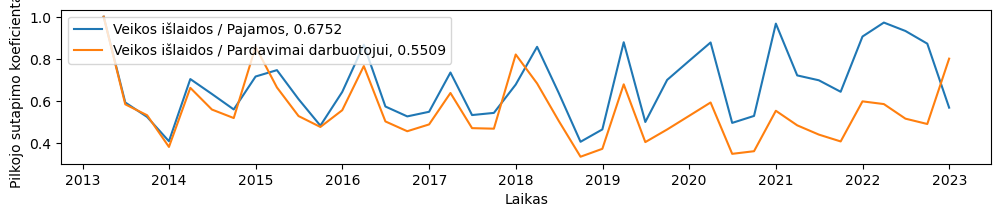

In [92]:
fig, ax = plt.subplots(figsize=[12, 2])
coefs12 = np.array(gama_12)
coefs13 = np.array(gama_13)
t = df3.index.values

g2 = "{:.4f}".format(gama2)
g3 = "{:.4f}".format(gama3)
ax.plot(t, coefs12, label=label1+" / "+label2+", "+g2)
ax.plot(t, coefs13, label=label1+" / "+label3+", "+g3)

ax.set_xlabel("Laikas")
ax.set_ylabel("Pilkojo sutapimo koeficientas")
ax.legend()
plt.savefig("grey_incidence.png", dpi=300)
plt.show()

## Fazinės erdvės rekonstravimas (požymių išskyrimo alternatyva)

### Netiesinių sąryšių pieška lyginant vėlinimus ir atraktorių formas

In [93]:
def PolyArea2D(pts):
    lines = np.hstack([pts,np.roll(pts,-1,axis=0)])
    area = 0.5*abs(sum(x1*y2-x2*y1 for x1,y1,x2,y2 in lines))
    return area

pts = [[0,0],[0.98,0],[1,1],[0,1]]
print(PolyArea2D(pts))

0.99


In [94]:
#fnm = "../data/df_pzv_X.pckl"
#with open(fnm, "rb") as f:
#    X = pickle.load(f)

In [95]:
def FER(x, maxtau):
    """
    Fazinės erdvės rekonstravimas.
    """
    #x = x[~np.isnan(x)]
    nn = len(x)
    tau_opt = -1
    v = -1
    #x1_opt = []
    #x2_opt = []
    for tau in range(1, maxtau+1):
        x1 = x[0:(nn-tau)]/x[0]
        x2 = x[tau:nn]/x[tau]
        pts = list(zip(x1, x2))
        v_c = PolyArea2D(pts)
        if v_c > v:
            v = v_c
            tau_opt = tau
            x1_opt = x1
            x2_opt = x2
    return((x1_opt, x2_opt, tau_opt, v))

x = np.array(X[0])
x1, x2, tau, v = FER(x, 20)
x, x1, x2, tau, v

(array([ 9.9512 , 14.27412, 14.27412,  9.4186 ,  9.5295 , 12.007  ,
        11.7686 ,  8.8122 ,  8.4096 , 11.9757 , 14.2732 , 10.7045 ,
         7.0877 , 11.779  , 12.6288 ,  8.3214 ,  7.1771 , 11.5532 ,
        12.057  ,  8.415  ,  7.707  ,  9.029  , 10.088  , 10.748  ,
         6.782  ,  8.917  , 10.125  ,  6.397  ,  5.305  ,  7.019  ,
         9.961  ,  7.133  ,  6.994  ,  9.575  ,  9.379  ,  7.591  ,
         5.617  ,  6.138  ,  4.653  ,  4.811  ]),
 array([1.        , 1.43441193, 1.43441193, 0.94647882, 0.9576232 ,
        1.20658815, 1.18263124, 0.88554144, 0.84508401, 1.2034428 ,
        1.43431948, 1.07569941, 0.71224576, 1.18367634, 1.26907308,
        0.83622076, 0.7212296 , 1.16098561, 1.21161267, 0.84562666,
        0.77447946, 0.90732776, 1.01374709, 1.08007075, 0.68152585,
        0.89607284, 1.01746523, 0.64283704, 0.53310154, 0.70534207,
        1.00098481, 0.71679797, 0.70282981]),
 array([1.        , 0.95431334, 1.35899094, 1.61970904, 1.21473639,
        0.80430539, 

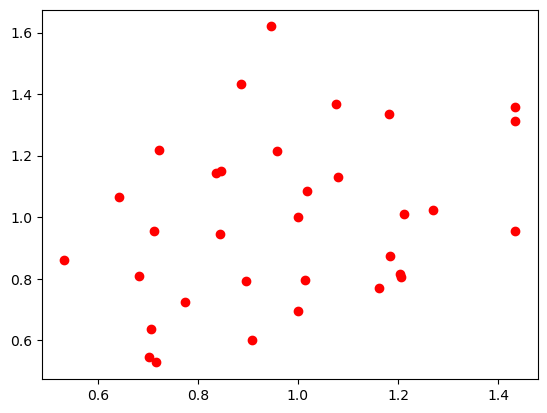

In [96]:
plt.plot(x1, x2, 'or')
plt.show()

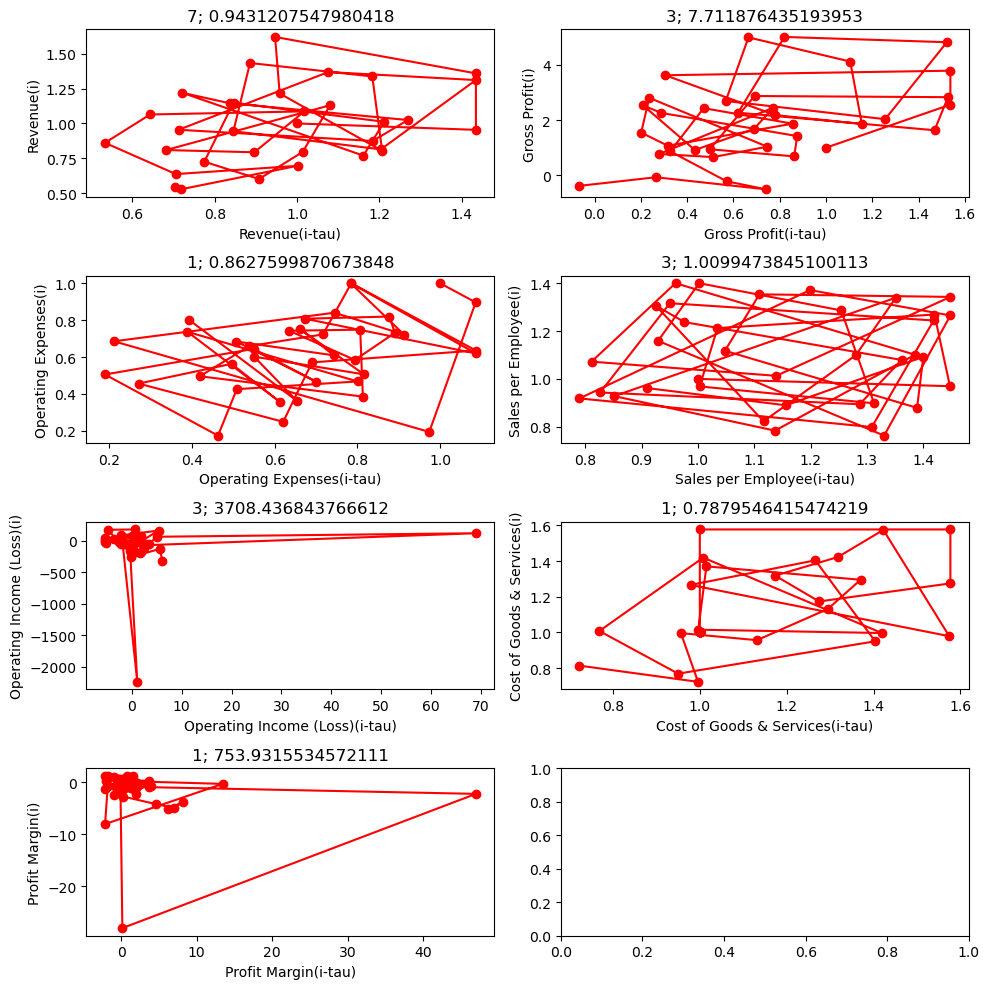

In [97]:
fig, axs = plt.subplots(4, 2, figsize=[10, 10])
pavs = df3.columns
for i in range(len(X)):
    x = np.array(X[i])
    # Faz. erdv. rekonstravimas
    x1, x2, tau, v = FER(x, 10)
    ax = axs.flatten()[i]
    ax.plot(x1, x2, 'ro')
    ax.plot(x1, x2, 'r-')
    ax.set_xlabel(pavs[i]+"(i-tau)")
    ax.set_ylabel(pavs[i]+"(i)")
    ax.set_title(str(tau)+"; "+str(v))
    plt.tight_layout()
plt.show()

### Netiesinių sąsajų paieška tarp skirtingų (vėlintų) kintamųjų

### V1 (Vienas su visais su skirtingais vėlinimais)

In [98]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

1 1 1.3366308291048767


NameError: name 'labels' is not defined

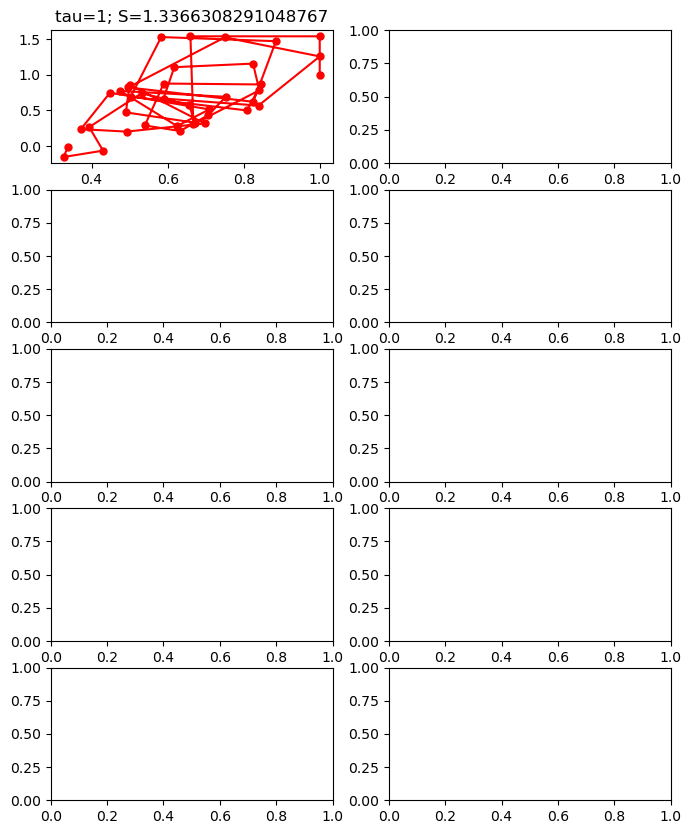

In [99]:
i1 = 0
(fig, axs) = plt.subplots(5, 2, figsize=(8,10))
colors = ['r', 'b', 'g', 'y', 'c']

for i2 in range(1, 3):
    for tau in range(1, 6):
        n = len(X[i1])
        xx1 = X[i1][tau:]
        xx2 = X[i2][0:(n-tau)]
        xx1 = xx1 / xx1[0]
        xx2 = xx2 / xx2[0]
        pa = PolyArea(xx1, xx2)
        print(i2, tau, pa)
        axs[tau-1, i2-1].plot(xx1, xx2, colors[tau-1]+'-')
        axs[tau-1, i2-1].plot(xx1, xx2, colors[tau-1]+'.', markersize=10)
        axs[tau-1, i2-1].set_title("tau="+str(tau)+"; S="+str(pa))
        axs[tau-1, i2-1].set(xlabel=labels[i1])
        axs[tau-1, i2-1].set(ylabel=labels[i2])
plt.gcf().tight_layout()
plt.show()

### V2 (Vienas su visais, randant optimalų vėlinimą)

In [100]:
def FER2(x, y, maxtau):
    """
    Fazinės erdvės rekonstravimas tarp 2 kintamųjų.
    """
    nn = len(x)
    tau_opt = -1
    v = -1
    x1_opt = []
    x2_opt = []
    for tau in range(1, maxtau+1):
        x1 = x[0:(nn-tau)]/x[0]
        x2 = y[tau:nn]/y[tau]
        pts = list(zip(x1, x2))
        v_c = PolyArea2D(pts)
        if v_c > v:
            v = v_c
            tau_opt = tau
            x1_opt = x1
            x2_opt = x2
    return((x1, x2, tau_opt, v))

#x1, x2, tau, v = FER(X[0], X[1], 3)
#x, x1, x2, tau, v

In [101]:
#X_norm = [Xi / Xi[0] for Xi in X]
#labels = pavs #[label1, label2, label3]

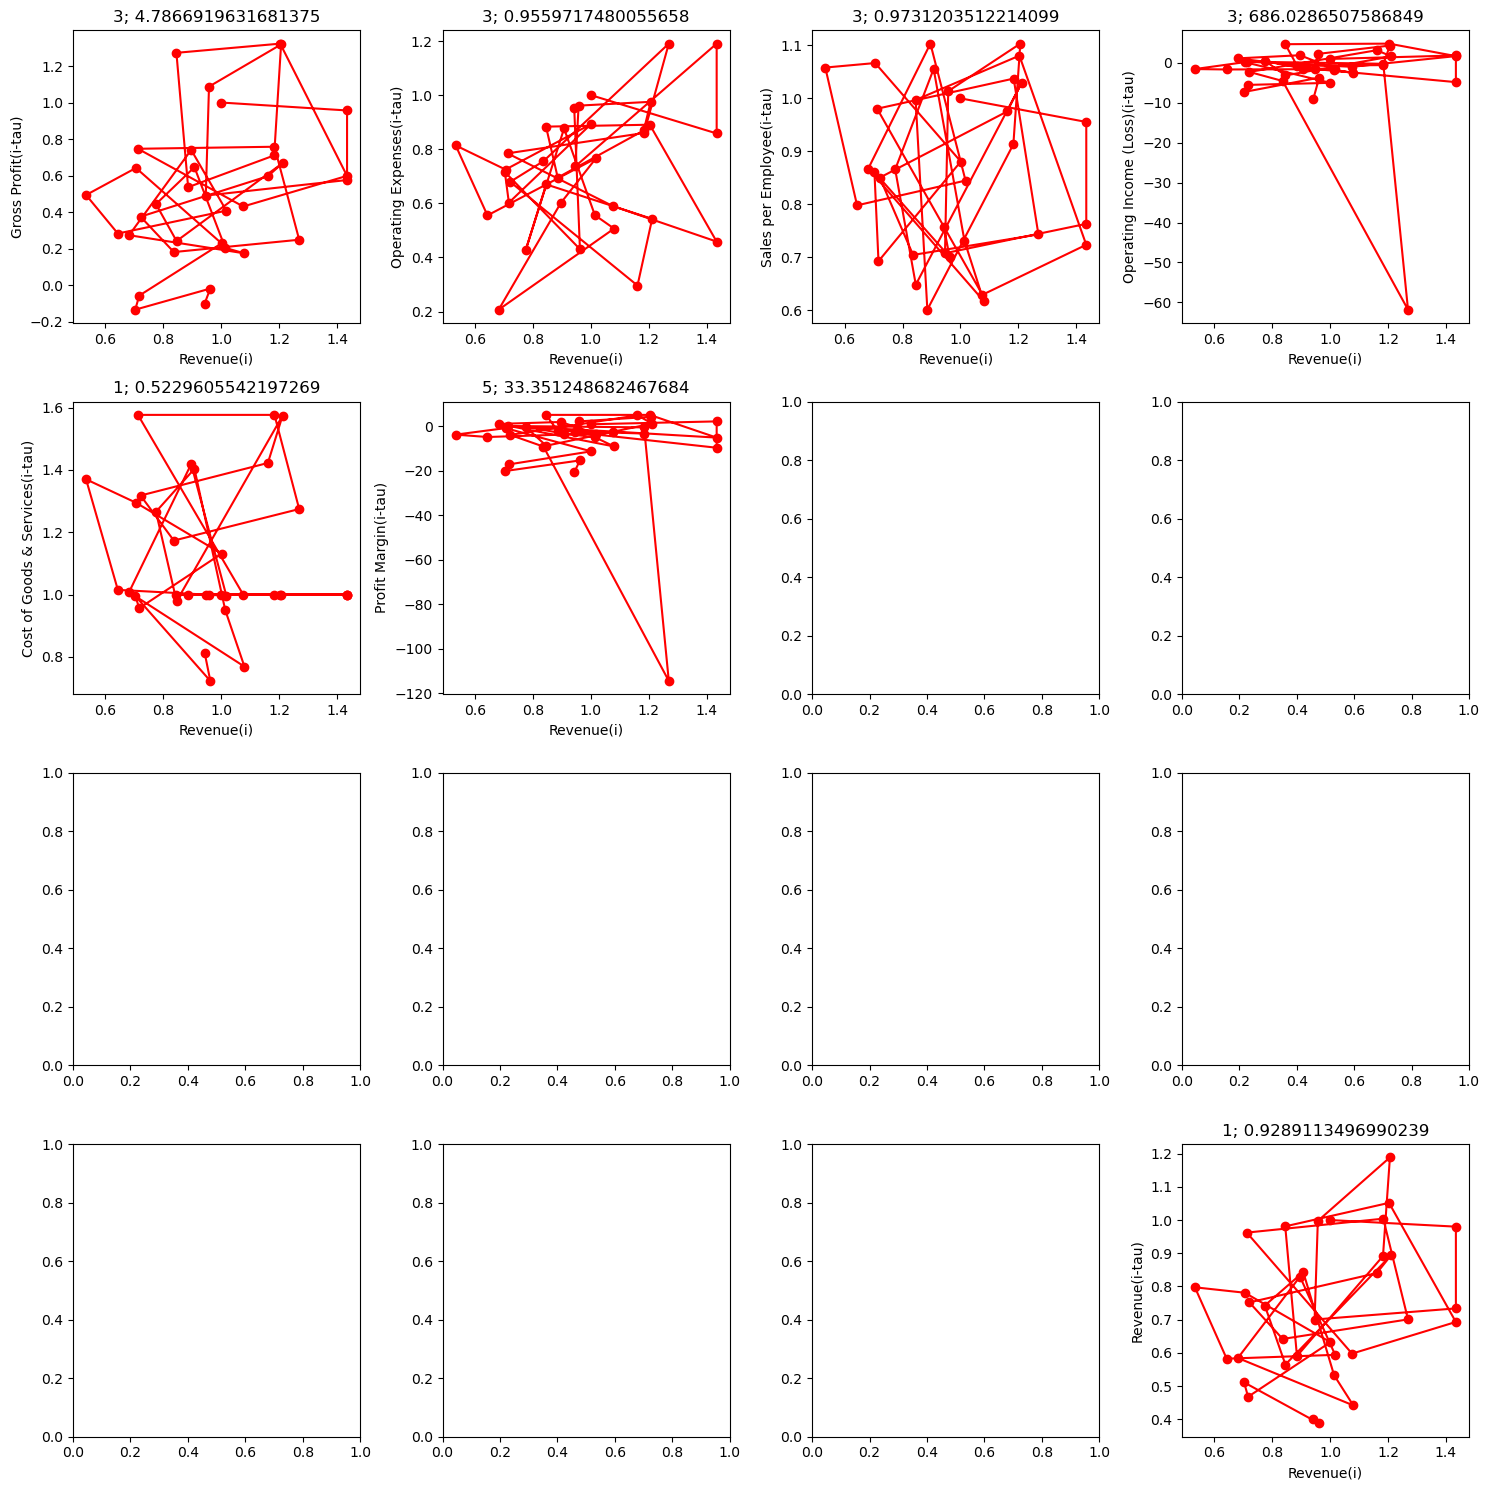

In [102]:
fig, axs = plt.subplots(4, 4, figsize=[15, 15])
for i in range(len(X)):
    x10 = np.array(X[0])
    x20 = np.array(X[i])
    # Faz. erdv. rekonstravimas
    x1, x2, tau, v = FER2(x10, x20, 5)
    ax = axs.flatten()[i-1]
    ax.plot(x1, x2, 'ro')
    ax.plot(x1, x2, 'r-')
    ax.set_xlabel(pavs[0]+"(i)")
    ax.set_ylabel(pavs[i]+"(i-tau)")
    ax.set_title(str(tau)+"; "+str(v))
    plt.tight_layout()
plt.show()

In [103]:
# TODO: rasti didziausia...

# Grangerio priežastingumo testas

In [104]:
if 0:
    fnm = "df_pzv_X.pckl"
    with open(fnm, "rb") as f:
        X = pickle.load(f)

In [105]:
pavs

Index(['Revenue', 'Gross Profit', 'Operating Expenses', 'Sales per Employee',
       'Operating Income (Loss)', 'Cost of Goods & Services', 'Profit Margin'],
      dtype='object', name='')

In [106]:
# H0: x tiesiškai neprognozuoja / nedaro įtakos y
# Ha: x tiesiškai prognozuoja / daro įtaką y

# Naudojamas Fišerio testas
# Jei p < α, atmetame H0.

from statsmodels.tsa.stattools import grangercausalitytests

i1 = 0
i2 = 2

res = grangercausalitytests(np.array([X[i1], X[i2]]).transpose(), maxlag=[3]) # x -> y
#dir(res[3][1][0].model)


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6904  , p=0.5651  , df_denom=30, df_num=3
ssr based chi2 test:   chi2=2.5543  , p=0.4656  , df=3
likelihood ratio test: chi2=2.4700  , p=0.4807  , df=3
parameter F test:         F=0.6904  , p=0.5651  , df_denom=30, df_num=3


In [107]:
grangercausalitytests(df3[["Revenue", "Operating Expenses"]], maxlag=[1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0099  , p=0.9211  , df_denom=36, df_num=1
ssr based chi2 test:   chi2=0.0108  , p=0.9173  , df=1
likelihood ratio test: chi2=0.0108  , p=0.9174  , df=1
parameter F test:         F=0.0099  , p=0.9211  , df_denom=36, df_num=1


{1: ({'ssr_ftest': (0.009940381886248276, 0.9211344894454718, 36.0, 1),
   'ssr_chi2test': (0.01076874704343563, 0.9173498319850532, 1),
   'lrtest': (0.010767260574596094, 0.9173555160631084, 1),
   'params_ftest': (0.009940381886240364, 0.9211344894454876, 36.0, 1.0)},
   array([[0., 1., 0.]])])}

In [108]:
# Duomenys turi būti stacionarūs
# ADF H0: eilutė yra nestacionari
from statsmodels.tsa.stattools import adfuller
result = adfuller(df3['Revenue'])
print('ADF statistika: %f' % result[0])
print('p reikšmė: %f' % result[1])
print('Kritinės reikšmės:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF statistika: 0.629436
p reikšmė: 0.988319
Kritinės reikšmės:
	1%: -3.661
	5%: -2.961
	10%: -2.619


In [109]:
# Diferencijuojame, kol stacionaru
df3.loc[:,'Revenue'] = (df3['Revenue'] - df3['Revenue'].shift(1))
# Galima naudoti kitus būdus, pvz VAR modelį.
df4 = df3['Revenue'].dropna()
df4

2013-06-30    4.32292
2013-09-30    0.00000
2013-12-31   -4.85552
2014-03-31    0.11090
2014-06-30    2.47750
2014-09-30   -0.23840
2014-12-31   -2.95640
2015-03-31   -0.40260
2015-06-30    3.56610
2015-09-30    2.29750
2015-12-31   -3.56870
2016-03-31   -3.61680
2016-06-30    4.69130
2016-09-30    0.84980
2016-12-31   -4.30740
2017-03-31   -1.14430
2017-06-30    4.37610
2017-09-30    0.50380
2017-12-31   -3.64200
2018-03-31   -0.70800
2018-06-30    1.32200
2018-09-30    1.05900
2018-12-31    0.66000
2019-03-31   -3.96600
2019-06-30    2.13500
2019-09-30    1.20800
2019-12-31   -3.72800
2020-03-31   -1.09200
2020-06-30    1.71400
2020-09-30    2.94200
2020-12-31   -2.82800
2021-03-31   -0.13900
2021-06-30    2.58100
2021-09-30   -0.19600
2021-12-31   -1.78800
2022-03-31   -1.97400
2022-06-30    0.52100
2022-09-30   -1.48500
2022-12-31    0.15800
Name: Revenue, dtype: float64

In [110]:
# Duomenys turi būti stacionarūs
# ADF H0: eilutė yra nestacionari
from statsmodels.tsa.stattools import adfuller
result = adfuller(df4)
print('ADF statistika: %f' % result[0])
print('p reikšmė: %f' % result[1])
print('Kritinės reikšmės:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF statistika: -3.068607
p reikšmė: 0.028965
Kritinės reikšmės:
	1%: -3.689
	5%: -2.972
	10%: -2.625


* Pabraižyti atraktorius kiekvienam straipsniui atskirai ir taip įvertinti sąsajas.
* Pasiskaičiuoti Grangerio koefientą ir palyginti su skaičiavimais, kuriuose naudoti vėlinimai.

## Išvados

1. Koreliacijos - tiesinio (jei netiesinta) ryšio įvertinimui
2. Pilkasis sutapimo lygis - atstumo tarp eilučių dinamikos įvertinimui
    * išvados gali nesutapti su koreliacija
    * lengvai realizuojamas
3. Fazinės erdvės rekonstravimas.
    * didžiausio tūrio atraktorius atitinka optimalų vėlinimą $\tau$
    * Vienodi vėlinimai ir / ar atraktorių tūriai parodo galimai panašią dinamiką
    * nebūtinai išvados sutampa su koreliacijom
4. Priežastingumui nagrinėti su Grangerio analize reikia stacionarių duomenų.
    * Integruoti tol, kl stacionarūs.
    * ARBA Normuoti arba kitaip transformuoti.

In [4]:
pip install pandas numpy matplotlib statsmodels fbprophet


Looking in indexes: http://172.17.0.1:3143/root/pypi/+simple/
  Using cached http://172.17.0.1:3143/root/pypi/%2Bf/3ac/63a05caf5117d/fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached http://172.17.0.1:3143/root/pypi/%2Bf/ba6/0fb1f9daf9a33/cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached http://172.17.0.1:3143/root/pypi/%2Bf/c40/235ffdabdc762/pystan-3.9.1-py3-none-any.whl (13 kB)
  Using cached http://172.17.0.1:3143/root/pypi/%2Bf/5ef/25883d73898b3/LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached http://172.17.0.1:3143/root/pypi/%2Bf/fcf/fe3a675221726/convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached http://172.17.0.1:3143/root/pypi/%2Bf/7f1/7ce3a29bc7719/holidays-0.50-py3-none-any.whl (1.0 MB)
  Using cached http://172.17.0.1:3143/root/pypi/%2Bf/e77/64dccce7d97b4/setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached http://172.17.0.1:3143/root/pypi/%2Bf/e21/a81205

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL

# Load your dataset
df = pd.read_pickle('df_2024_VLN.pckl')
df.reset_index(inplace=True)
df.rename(columns={ df.columns[0]: "date" }, inplace = True)

# Ensure the data is sorted by date column
df = df.sort_values(by='date')




In [ ]:
pip install prophet

In [ ]:
pip install neuralprophet

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from neuralprophet import NeuralProphet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_149141/3440769028.py:2: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.


WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names


WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.


WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) -

Finding best initial lr:   0%|          | 0/203 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 80.0% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.11/site-packages/neuralprophet/df_utils.py:1173: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.


WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.11/site-packages/neuralprophet/df_utils.py:1173: FutureWarning:

'Q' is deprecated and will be removed in a future version, please us

Predicting: 5it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


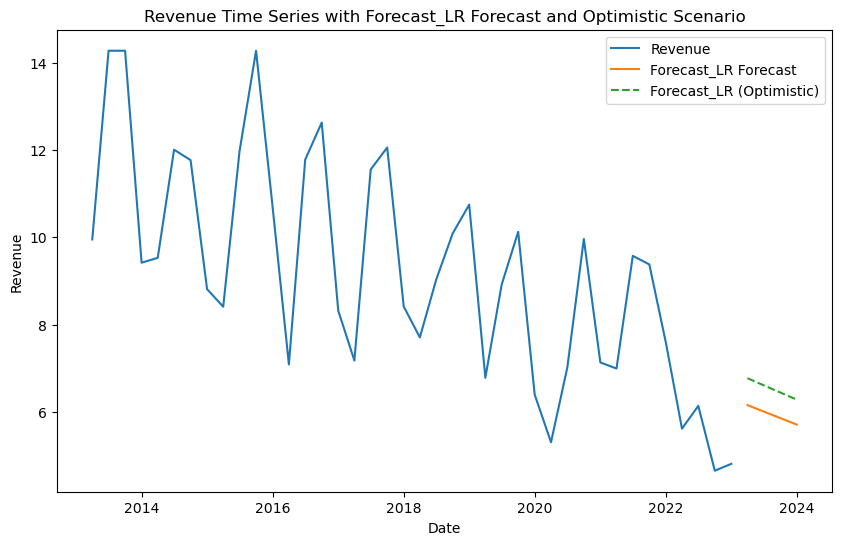

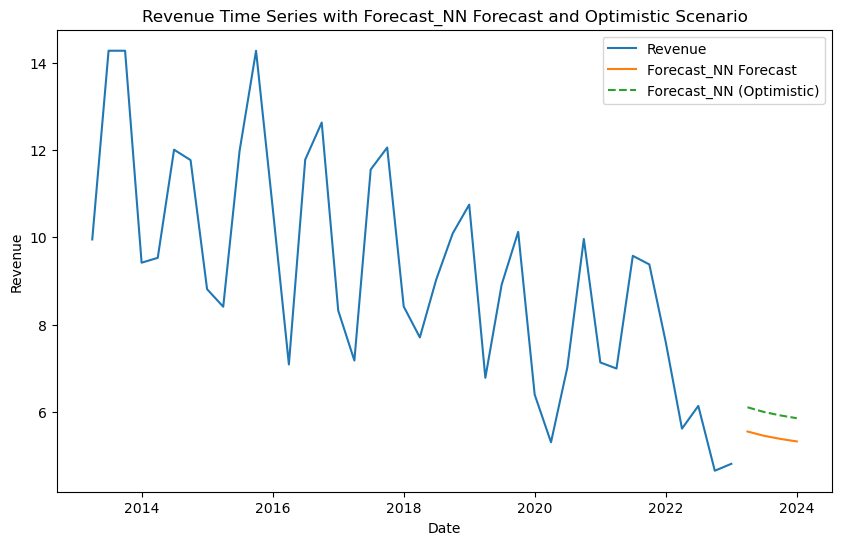

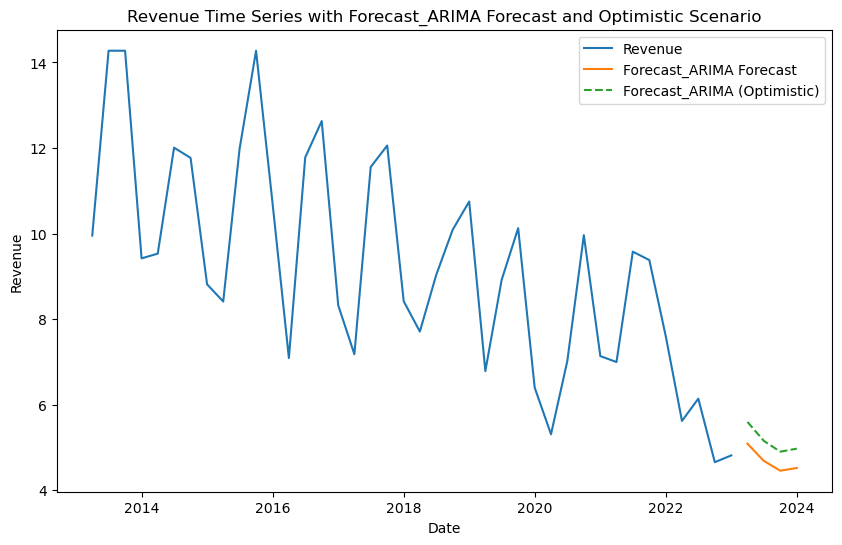

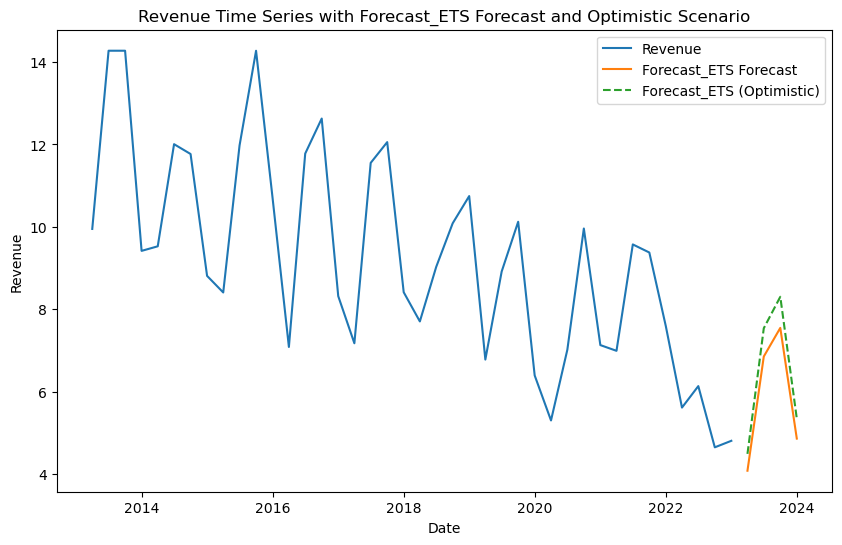

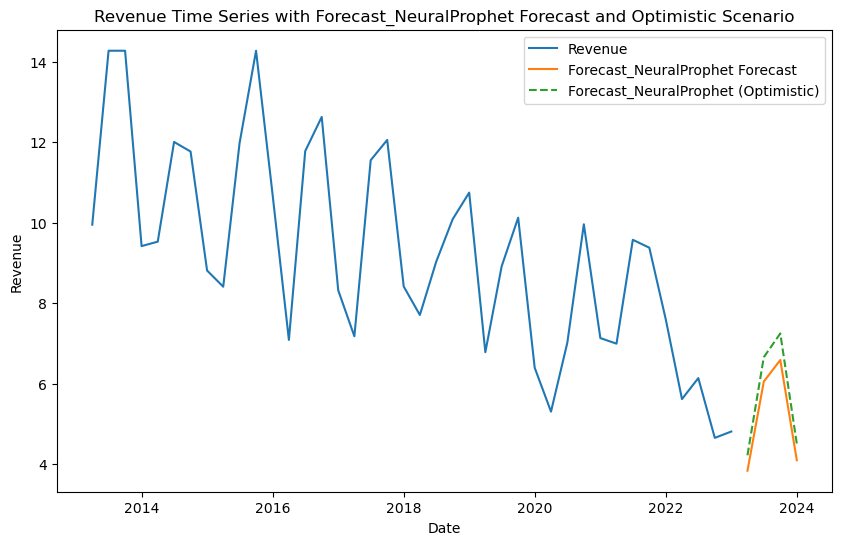


Prognoze kitiems metams:
         date  Forecast_LR  Forecast_NN  Forecast_ARIMA  Forecast_ETS  \
40 2023-03-31     6.156559     5.551423        5.085413      4.085332   
41 2023-06-30     6.007627     5.454400        4.683456      6.856031   
42 2023-09-30     5.858695     5.382034        4.452909      7.550094   
43 2023-12-31     5.709763     5.323748        4.517029      4.864482   

    Forecast_NeuralProphet  
40                3.836766  
41                6.052111  
42                6.588768  
43                4.098512  


In [28]:
# Prepare for forecasts
future_dates = pd.date_range(start='2023-01-01', periods=4, freq='Q')  # Next 4 quarters

# 2. Linear Regression
df['time_index'] = np.arange(len(df))
X = df[['time_index']]
y = df['Revenue']

model_lr = LinearRegression()
model_lr.fit(X, y)
future_time_index = np.arange(len(df), len(df) + len(future_dates)).reshape(-1, 1)
df['Forecast_LR'] = model_lr.predict(X)
forecast_lr = model_lr.predict(future_time_index)

# 3. Neural Network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_nn = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
model_nn.fit(X_scaled, y)
df['Forecast_NN'] = model_nn.predict(X_scaled)
future_X_scaled = scaler.transform(future_time_index)
forecast_nn = model_nn.predict(future_X_scaled)

# 4. ARIMA
model_arima = ARIMA(df['Revenue'], order=(5, 1, 0)).fit()
df['Forecast_ARIMA'] = model_arima.fittedvalues
forecast_arima = model_arima.forecast(steps=len(future_dates))

# 5. Exponential Smoothing (ETS)
model_ets = ExponentialSmoothing(df['Revenue'], trend='add', seasonal='add', seasonal_periods=4).fit()
df['Forecast_ETS'] = model_ets.fittedvalues
forecast_ets = model_ets.forecast(steps=len(future_dates))

# 6. NeuralProphet Model
df_neuralprophet = df[['date', 'Revenue']].rename(columns={'date': 'ds', 'Revenue': 'y'})
model_neuralprophet = NeuralProphet()
model_neuralprophet.fit(df_neuralprophet, freq='Q')

# Forecast with NeuralProphet
future = model_neuralprophet.make_future_dataframe(df_neuralprophet, periods=len(future_dates))
forecast = model_neuralprophet.predict(future)

# Extract forecasts from NeuralProphet
forecast_neuralprophet = forecast['yhat1'][-len(future_dates):].values

# Combine forecasts into DataFrame
future_df = pd.DataFrame({
    'date': future_dates,
    'Forecast_LR': forecast_lr,
    'Forecast_NN': forecast_nn,
    'Forecast_ARIMA': forecast_arima,
    'Forecast_ETS': forecast_ets,
    'Forecast_NeuralProphet': forecast_neuralprophet
})

# Create optimistic scenarios (e.g., 10% increase)
optimistic_scenarios = future_df.set_index('date') * 1.10

# Plot individual forecasts and optimistic scenarios
for col in future_df.columns[1:]:
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['Revenue'], label='Revenue')
    plt.plot(future_df['date'], future_df[col], label=f'{col} Forecast')
    plt.plot(optimistic_scenarios.index, optimistic_scenarios[col], linestyle='--', label=f'{col} (Optimistic)')
    plt.title(f'Revenue Time Series with {col} Forecast and Optimistic Scenario')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.legend()
    plt.show()

# Comparison of Models using RMSE, MAE, and AIC
models = {
    'Linear Regression': df['Forecast_LR'],
    'Neural Network': df['Forecast_NN'],
    'ARIMA': df['Forecast_ARIMA'],
    'ETS': df['Forecast_ETS'],
    'NeuralProphet': df_neuralprophet.set_index('ds')['y']  # Correcting this line
}


print("\nPrognoze kitiems metams:")
print(future_df)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# AIC calculation for ARIMA model
aic_arima = model_arima.aic

# RMSE and MAE calculations
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

# Collect actual and forecasted values
actual_values = df['Revenue']


forecast_values = {
    'ARIMA': df['Forecast_ARIMA'],
    'ETS': df['Forecast_ETS']
}

# Calculate statistics
statistics = {}
for model_name, forecasts in forecast_values.items():
    rmse = calculate_rmse(actual_values, forecasts)
    mae = calculate_mae(actual_values, forecasts)
    if model_name == 'ARIMA':
        statistics[model_name] = {'RMSE': rmse, 'MAE': mae, 'AIC': aic_arima}
    else:
        statistics[model_name] = {'RMSE': rmse, 'MAE': mae}

# Print statistics
print("Gautų modelių palyginimas:")
for model_name, stats in statistics.items():
    print(f"{model_name}:")
    for stat_name, value in stats.items():
        print(f"  {stat_name}: {value}")

# Display forecast for next year
print("\nForecast for the next year:")


Gautų modelių palyginimas:
ARIMA:
  RMSE: 2.180376580033687
  MAE: 1.3985010273315657
  AIC: 152.24794644775622
ETS:
  RMSE: 1.1836790941379118
  MAE: 0.9538978706986514

Forecast for the next year:
